In [1]:
import numpy as np

In [2]:
import scipy.stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
delta=1e-2
span = np.arange(-15,15,delta)

In [5]:
values = scipy.stats.cauchy(0,0.5).pdf(span)*delta
values2 = scipy.stats.cauchy(-0.02,0.52).pdf(span)*delta

In [6]:
prob1 = 0.006
prob2 = 0.004
strength1 = 15
strength2= 60
smearer1 = scipy.stats.crystalball(loc=0,scale=0.0001*strength1,beta=0.6,m=2)
smearer2 = scipy.stats.norm(loc=1,scale=0.0001*strength2)

post_measured = []
for n,value in enumerate(span):
#     print(n)
    value_new = value
    for interaction_possibility in range(0,100):
        if np.random.random()>prob1:
            value_new+=smearer1.rvs(1)
        if np.random.random()>prob2:
            value_new*=smearer2.rvs(1)
    post_measured.append(value_new)
post_measured = np.array(post_measured).flatten()

In [7]:
prob1 = 0.0062
prob2 = 0.0038
strength1 = 16
strength2= 58
smearer1 = scipy.stats.crystalball(loc=0,scale=0.0001*strength1,beta=0.6,m=2)
smearer2 = scipy.stats.norm(loc=1,scale=0.0001*strength2)

independent_measurement = []
for n,value in enumerate(span):
#     print(n)
    value_new = value
    for interaction_possibility in range(0,100):
        if np.random.random()>prob1:
            value_new+=smearer1.rvs(1)
        if np.random.random()>prob2:
            value_new*=smearer2.rvs(1)
    independent_measurement.append(value_new)
independent_measurement = np.array(independent_measurement).flatten()

(-15.0, 15.0)

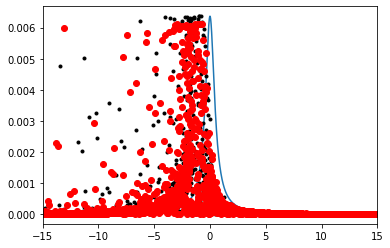

In [8]:
plt.plot(span, values)
plt.plot(post_measured, values,"k.")
plt.plot(independent_measurement, values2,"ro")

plt.xlim(-15,15)

In [9]:
def do_measurement(span1,span2, size, distribution):
    idx = np.random.choice(np.arange(len(span)), size=size, p=distribution/np.sum(distribution))
    return span1[idx], span2[idx]

In [10]:
pre_spreading,post_spreading = do_measurement(span,post_measured, 10000, values,)
_,measurement = do_measurement(span,independent_measurement, 1000, values,)

In [11]:
import b2plot as bp
plt.style.use("belle2")

For optimal usage set `plt.style.use('belle2')`


(-15.0, 15.0)

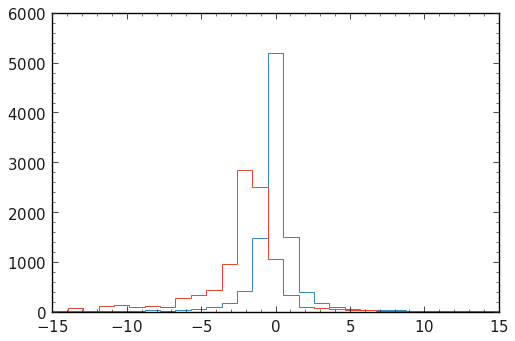

In [12]:
_ = bp.hist(pre_spreading, bins=np.linspace(span[0],span[-1],30))
_ = bp.hist(post_spreading, bins=np.linspace(span[0],span[-1],30))
plt.xlim(-15,15)

In [23]:
unfolding_bins=15
unfolding_range=(-5,5)

(-5.0, 5.0)

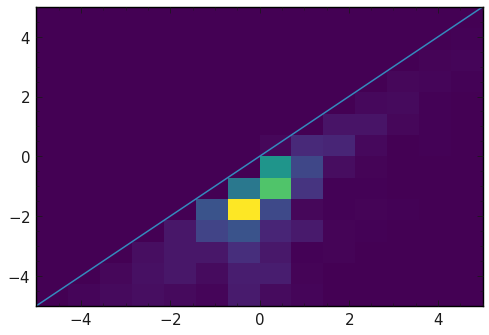

In [24]:
_ = plt.hist2d(pre_spreading, post_spreading, bins=[np.linspace(*unfolding_range,unfolding_bins),np.linspace(*unfolding_range,unfolding_bins)])
plt.plot(np.linspace(*unfolding_range,unfolding_bins),np.linspace(*unfolding_range,unfolding_bins))
plt.xlim(*unfolding_range)
plt.ylim(*unfolding_range)

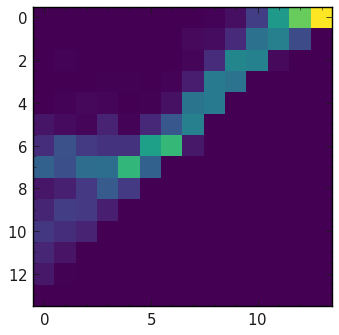

In [25]:
n_matrix, _, _ = np.histogram2d(x=pre_spreading, y=post_spreading, bins=[np.linspace(*unfolding_range,unfolding_bins),np.linspace(*unfolding_range,unfolding_bins)])
x = np.linalg.norm(n_matrix, ord=1, axis=0)
mig_matrix = n_matrix/np.expand_dims(x, axis=0)
plt.imshow(mig_matrix[::-1])

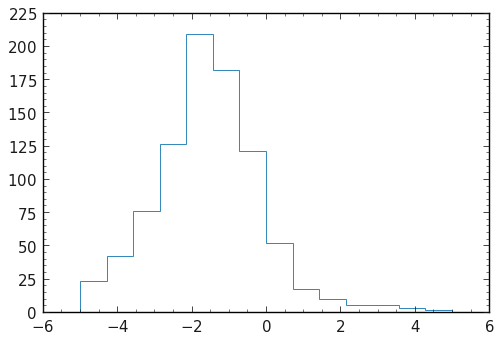

In [26]:
n,_,_ = bp.hist(measurement, bins=np.linspace(*unfolding_range,unfolding_bins))

In [27]:
unfolded = mig_matrix.dot(n)

(-5.0, 5.0)

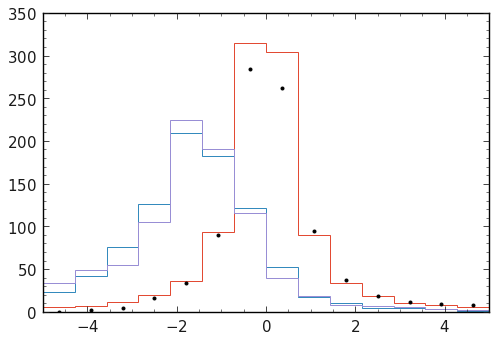

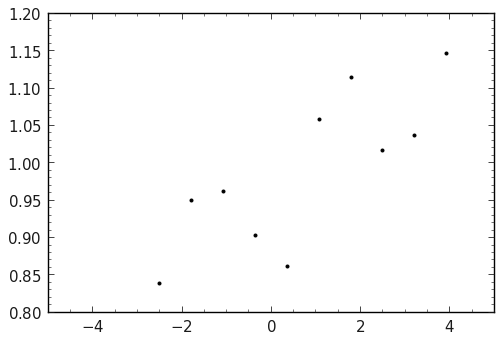

In [28]:
test,_,_ = bp.hist(measurement, bins=np.linspace(*unfolding_range,unfolding_bins))
test,_,_ = bp.hist(pre_spreading, bins=np.linspace(*unfolding_range, unfolding_bins), scale=1/10)
_ = bp.hist(post_spreading, bins=np.linspace(*unfolding_range, unfolding_bins), scale=1/10)

plt.plot(bp.bc(np.linspace(*unfolding_range,unfolding_bins)), unfolded, "k.")
plt.xlim(-5,5)

fig,ax = plt.subplots()
ax.plot(bp.bc(np.linspace(*unfolding_range,unfolding_bins)), unfolded/test, "k.")
ax.set_ylim(0.8,1.2)
ax.set_xlim(-5,5)
